In [1]:
## Important Options:
run_epochs = 300 
run_model_type = "semi_y_CLSVAE"

run_save_folder = "../../outputs/experiments_test/freyfaces/clsvae/" 
run_read_data_folder = "../../data/examples_frey_faces/corrupt_level_35_percent/run_1/" # 1 2 3
trust_set_name = "10_samples_per_class" # 5; 10; 25, 50;



In [2]:
ls ../../outputs

experiments_test/


In [3]:
%run ../repair_syserr_models/main.py \
    --cuda-on \
    --save-on \
    --output-folder {run_save_folder} \
    --verbose-metrics-epoch \
    --model-type {run_model_type} \
    --number-epochs {run_epochs} \
    --dataset-folder {run_read_data_folder} \
    --semi-supervise \
    --use-sup-weights \
    --sup-loss-coeff 1000.0 \
    --kl-anneal \
    --kl-anneal-start 0.0 \
    --kl-anneal-stop 1.0 \
    --kl-anneal-ratio 0.2 \
    --kl-anneal-delay-epochs 10 \
    --sigma-eps-z-in 0.6 \
    --mean-eps-z-in 0.0 \
    --y-clean-prior 0.6 \
    --fixed-prior-z-clean 0.2 \
    --fixed-prior-z-dirty 5.0 \
    --dist-corr-reg \
    --reg-delay-n-epochs 10 \
    --reg-schedule-ratio 0.5 \
    --dist-corr-reg-coeff 1000.0 \
    --trust-set-name {trust_set_name}



Namespace(activation='relu', batch_size=128, cuda_on=True, data_folder='../../data/examples_frey_faces/corrupt_level_35_percent/run_1/', dist_corr_reg=True, dist_corr_reg_coeff=1000.0, embedding_size=50, fixed_prior_z_clean=0.2, fixed_prior_z_dirty=5.0, fixed_prior_zy0_sigma=5.0, fixed_prior_zy1_sigma=1.0, kl_anneal=True, kl_anneal_cycles=1, kl_anneal_delay_epochs=10, kl_anneal_ratio=0.2, kl_anneal_start=0.0, kl_anneal_stop=1.0, kl_beta_const=1.0, l2_reg=0.0, latent_dim=15, layer_size=400, learn_z_given_y_priors=False, load_model=False, load_model_path=None, log_interval=50, lr=0.001, mean_eps_z_in=0.0, model_type='semi_y_CLSVAE', number_epochs=300, output_folder='../../outputs/experiments_test/freyfaces/clsvae/', q_y_x_coeff=1.0, qy_sup_weights=[1.0, 1.0], reg_delay_n_epochs=10, reg_schedule_ratio=0.5, save_on=True, semi_supervise=True, sigma_eps_z_in=0.6, size_input=560, size_output=560, sup_loss_coeff=1000.0, train_on_clean_data=False, trust_set_name='10_samples_per_class', use_batc

### Define Paths

In [4]:
# Data folder
file_path_data = run_read_data_folder + "train/"

# Experiment / results folder
model_type = run_model_type
file_path_exper = run_save_folder + model_type + "/"

In [5]:
# Check folder of dataset
!ls {file_path_data}/..

cols_info.json	full  noising_info.json  test  train  validation


In [6]:
with open(file_path_data + "y_noise_dict.json") as json_file:
    y_noise_dict_train = json.load(json_file)
    
#trusted_idxs_train = pd.read_csv(file_path_data + "trusted_idxs.csv").values.flatten()
trusted_idxs_train = pd.read_csv(file_path_data + f"/trusted_idxs_{trust_set_name}.csv").values.flatten()

In [7]:
ls "../../data/examples_frey_faces/corrupt_level_35_percent/run_1/train/"

cells_changed_mtx.csv                  trusted_idxs_25_samples_per_class.csv
changes_summary.csv                    trusted_idxs_50_samples_per_class.csv
data_clean.csv                         trusted_idxs_5_samples_per_class.csv
data_noised.csv                        tuples_changed_mtx.csv
original_idxs.csv                      y_noise_dict.json
trusted_idxs_10_samples_per_class.csv


### Check VARS on Notebook

In [8]:
whos

Variable               Type             Data/Info
-------------------------------------------------
StandardTrainer        type             <class 'repair_syserr_mod<...>r_utils.StandardTrainer'>
args                   Namespace        Namespace(activation='rel<...>False, y_clean_prior=0.6)
compute_metrics        function         <function compute_metrics at 0x7f0f315d6700>
dict_main_vars         dict             n=56
errno                  module           <module 'errno' (built-in)>
evaluation_phase       function         <function evaluation_phase at 0x7f0de952c5e0>
file_path_data         str              ../../data/examples_frey_<...>l_35_percent/run_1/train/
file_path_exper        str              ../../outputs/experiments<...>ces/clsvae/semi_y_CLSVAE/
frange_cycle_linear    function         <function frange_cycle_linear at 0x7f0debcceb80>
gen_utils              module           <module 'repair_syserr_mo<...>err_models/gen_utils.py'>
json                   module           <module

In [9]:
# debug vars -- from main.py
dict_main_vars.keys()

dict_keys(['args', 'train_loader', 'X_train', 'target_errors_train', 'dataset_obj', 'attributes', 'trusted_mask', 'train_loader_no_shuff', 'valid_loader', 'X_valid', 'target_errors_valid', 'dataset_valid_obj', '_', 'valid_loader_no_shuff', 'test_loader', 'X_test', 'target_errors_test', 'dataset_test_obj', 'test_loader_no_shuff', 'train_clean_loader', 'X_train_clean', 'dataset_obj_train_clean', 'train_clean_loader_no_shuff', 'X_valid_clean', 'dataset_obj_valid_clean', 'valid_clean_loader_no_shuff', 'X_test_clean', 'dataset_obj_test_clean', 'test_clean_loader_no_shuff', '_num_outliers_ts', '_num_inliers_ts', 'runin_model', 'model', 'train_optim', 'losses_save', 'kl_anneal', 'kl_beta_n_cycles', 'kl_beta_ratio', 'delay_n_epochs', 'delay_beta_vec', '_delay_n_epochs', 'kl_beta_vec', 'delay_reg_vec', 'reg_schedule_vec', '_train_loader_used', '_train_loader_no_shuff', '_valid_loader_no_shuff', '_test_loader_no_shuff', '_X_train', '_X_valid', '_X_test', 'epoch', 'kl_beta_val', 'reg_schedule_val

### Load Packages 

In [10]:
import pandas as pd
import numpy as np
import torch
import repair_syserr_models.gen_utils as gen_utils
from repair_syserr_models import semi_y_CLSVAE
import json

import pprint
import seaborn as sns
from matplotlib import pyplot as plt
import os
import json

### Check Dataset Definitions and Noising

In [11]:
with open(file_path_data + "../noising_info.json") as f:
    dt_defs = json.load(f)
pprint.pprint(dt_defs)


{'defs': {'combs_on': False,
          'max_val': 256,
          'min_val': 0,
          'number_blocks': 4,
          'p_img': 0.35,
          'p_min': 0.5,
          'pixel_val_fixed': None,
          'rand_blocks': True,
          'random_state': None,
          'side_len': 6,
          'std_shift': [10, 10],
          'use_other_patterns': False},
 'name': 'run_1',
 'noise_list_trusted': 'regular',
 'test_size': 0.1,
 'train_size': 0.8,
 'trusted_set': {'dataset_size': 1965,
                 'frac_trusted': None,
                 'mc_mode': 'fixed_number',
                 'min_coverage': True,
                 'n_classes': 5,
                 'percentages': [1.2722646310432568,
                                 2.5445292620865136,
                                 6.361323155216285,
                                 12.72264631043257],
                 'samples_fixed': [5, 10, 25, 50],
                 'total_points': [25, 50, 125, 250],
                 'use_labels': 'joint_classes'

In [12]:
with open(file_path_data + "../cols_info.json") as f:
    col_defs = json.load(f)
pprint.pprint(col_defs)

{'cat_cols_names': [],
 'dataset_type': 'image',
 'image_defs': {'channel_type': 'gray',
                'channels': [],
                'num_channels': 1,
                'size': [28, 20]},
 'num_cols_names': ['pixel_0',
                    'pixel_1',
                    'pixel_2',
                    'pixel_3',
                    'pixel_4',
                    'pixel_5',
                    'pixel_6',
                    'pixel_7',
                    'pixel_8',
                    'pixel_9',
                    'pixel_10',
                    'pixel_11',
                    'pixel_12',
                    'pixel_13',
                    'pixel_14',
                    'pixel_15',
                    'pixel_16',
                    'pixel_17',
                    'pixel_18',
                    'pixel_19',
                    'pixel_20',
                    'pixel_21',
                    'pixel_22',
                    'pixel_23',
                    'pixel_24',
                   

### Load Datasets

In [13]:


# train
train_loader, X_train, target_errors_train, dataset_obj, attributes, trusted_mask = gen_utils.load_data(args.data_folder, 
                                                                                                        args.batch_size,
                                                                                                        is_train=True,
                                                                                                        get_data_idxs=True,
                                                                                                        semi_sup_data=True,
                                                                                                        use_binary_img=False,
                                                                                                        trust_set_name=trust_set_name)
    

# Dynamic options for dataset_obj (from args)
dataset_obj.use_binary_img = args.use_binary_img


# test
test_loader, X_test, target_errors_test, _, _ = gen_utils.load_data(args.data_folder, 
                                                                    args.batch_size, 
                                                                    is_train=False,
                                                                    use_binary_img=False)

# -> clean versions for evaluation
_, X_train_clean, _, _, _ = gen_utils.load_data(args.data_folder, 
                                                args.batch_size,
                                                is_train=True, 
                                                is_clean=True, 
                                                stdize_dirty=True,
                                                use_binary_img=False)

_, X_test_clean, _, _, _ = gen_utils.load_data(args.data_folder, 
                                               args.batch_size, 
                                               is_train=False,
                                               is_clean=True, 
                                               stdize_dirty=True,
                                               use_binary_img=False)


In [14]:
args.data_folder

'../../data/examples_frey_faces/corrupt_level_35_percent/run_1/'

In [15]:
y_noise_instance_train = target_errors_train.any(dim=1).numpy()
y_noise_pixels_train = target_errors_train.numpy().reshape(-1,28,20)

x_train_orig = X_train.view(-1,28,20).numpy()*dataset_obj.cont_stds + dataset_obj.cont_means
x_train_clean_orig = X_train_clean.view(-1,28,20).numpy()*dataset_obj.cont_stds + dataset_obj.cont_means


In [16]:
dataset_obj.cont_means

154.0488358778626

In [17]:
dataset_obj.cont_stds

48.54248012196572

### Load Model

In [18]:
vae_mdl = eval(model_type).VAE(dataset_obj, args)
file_path_model = file_path_exper + "model_params.pth"
vae_mdl.load_state_dict(torch.load(file_path_model))
vae_mdl.eval()

VAE(
  (activ): ReLU()
  (q_y_logits_net): Sequential(
    (0): Linear(in_features=15, out_features=7, bias=True)
    (1): ReLU()
    (2): Linear(in_features=7, out_features=5, bias=True)
    (3): ReLU()
    (4): Linear(in_features=5, out_features=1, bias=True)
  )
  (q_y_dist): BernoulliDistModule(
    (logits): Sequential(
      (0): Linear(in_features=15, out_features=7, bias=True)
      (1): ReLU()
      (2): Linear(in_features=7, out_features=5, bias=True)
      (3): ReLU()
      (4): Linear(in_features=5, out_features=1, bias=True)
    )
  )
  (var_z_clean_encoder): baseEncoder(
    (activ): ReLU()
    (feat_embedd): ModuleList()
    (mod_fw_seq): Sequential(
      (fc_0): Linear(in_features=560, out_features=200, bias=True)
      (activ_0): ReLU()
      (fc_1): Linear(in_features=200, out_features=100, bias=True)
      (activ_1): ReLU()
      (fc_2): Linear(in_features=100, out_features=50, bias=True)
      (activ_2): ReLU()
    )
  )
  (var_z_dirty_encoder): baseEncoder(
    (a

### Load Results from Folder

In [19]:
df_train_metrics = pd.read_csv(file_path_exper + "train_epochs_data.csv")
df_valid_metrics = pd.read_csv(file_path_exper + "validation_epochs_data.csv")
df_test_metrics = pd.read_csv(file_path_exper + "test_epochs_data.csv")

In [20]:
!ls {file_path_exper}

args_run.json			train_error_repair_features.csv
model_params.pth		trusted_auc_features.csv
test_auc_features.csv		trusted_avpr_features.csv
test_avpr_features.csv		trusted_epochs_data.csv
test_epochs_data.csv		trusted_error_repair_features.csv
test_error_repair_features.csv	validation_auc_features.csv
train_auc_features.csv		validation_avpr_features.csv
train_avpr_features.csv		validation_epochs_data.csv
train_epochs_data.csv		validation_error_repair_features.csv


In [21]:
df_train_metrics

Epochs  Avg. TOTAL_LOSS  Avg. LOSS_ELBO  Avg. LOSS_SUP    Avg. NLL  \
0         1       842.533393      152.420631       0.707818  152.420631   
1         2       690.925149      135.673815       0.566010  135.673815   
2         3       539.688572      116.496708       0.421383  116.496708   
3         4       508.905309      112.413069       0.393453  112.413069   
4         5       492.128822      107.297900       0.383741  107.297900   
..      ...              ...             ...            ...         ...   
295     296      -338.466070     -338.487177       0.000023 -499.322159   
296     297      -332.768822     -332.783588       0.000016 -495.930035   
297     298      -344.844181     -344.860517       0.000018 -509.297500   
298     299      -349.209522     -349.227105       0.000019 -511.010727   
299     300      -344.499688     -344.515385       0.000017 -507.075828   

     Avg. KLD_TOT  Avg. KLD_Y  Avg. KLD_Z_Y1  Avg. KLD_Z_Y0  Avg. DIST_CORR  \
0     1147.985173    0.034070    1142.242046    1147.951107        0.945687   
1      507.347684    0.098803     497.130658     507.248887        0.720863   
2     1208.021748    0.376911    1179.752137    1207.644882        0.426526   
3     1157.551798    0.403391    1126.968333    1157.148413        0.304369   
4     1275.069845    0.261249    1253.533924    1274.808594        0.160980   
..            ...         ...            ...            ...             ...   
295     51.976824    0.892823      34.264250      51.084002        0.108858   
296     53.846691    0.900054      35.671728      52.946638        0.109300   
297     53.287304    0.898255      35.014029      52.389049        0.111150   
298     52.465142    0.900654      34.531479      51.564486        0.109318   
299     53.385987    0.902541      34.766645      52.483446        0.109174   

     ...  AVPR Cell nll score  AUC Row nll score  AVPR Row nll score  \
0    ...             0.948758           0.950694            0.902204   
1    ...             0.967661           0.962835            0.923256   
2    ...             0.885017           0.920280            0.849315   
3    ...             0.919585           0.935431            0.879077   
4    ...             0.885085           0.926853            0.868128   
..   ...                  ...                ...                 ...   
295  ...             0.977337           0.999782            0.999566   
296  ...             0.980038           0.999868            0.999740   
297  ...             0.977939           0.999827            0.999656   
298  ...             0.978508           0.999894            0.999790   
299  ...             0.978063           0.999802            0.999603   

     AUC Row class_y score  AVPR Row class_y score  \
0                 0.781490                0.730073   
1                 0.816700                0.774435   
2                 0.847537                0.817519   
3                 0.895371                0.880199   
4                 0.912671                0.901831   
..                     ...                     ...   
295               1.000000                1.000000   
296               1.000000                1.000000   
297               1.000000                1.000000   
298               1.000000                1.000000   
299               1.000000                1.000000   

     Error lower-bound on dirty pos  Error upper-bound on dirty pos  \
0                          0.751551                       21.566447   
1                          0.722221                       21.566447   
2                          0.716391                       21.566447   
3                          0.622536                       21.566447   
4                          0.632821                       21.566447   
..                              ...                             ...   
295                        0.173682                       21.566447   
296                        0.175915                       21.566447   
29

In [22]:
df_valid_metrics

Epochs  Avg. TOTAL_LOSS  Avg. LOSS_ELBO  Avg. LOSS_SUP    Avg. NLL  \
0         1       153.242108      153.242108            0.0  153.242108   
1         2       135.246936      135.246936            0.0  135.246936   
2         3       115.395254      115.395254            0.0  115.395254   
3         4       111.360132      111.360132            0.0  111.360132   
4         5       106.515620      106.515620            0.0  106.515620   
..      ...              ...             ...            ...         ...   
295     296      -284.599290     -284.599290            0.0 -426.669723   
296     297      -286.326590     -286.326590            0.0 -429.153569   
297     298      -289.216448     -289.216448            0.0 -430.971859   
298     299      -295.620117     -295.620117            0.0 -435.881696   
299     300      -293.065589     -293.065589            0.0 -432.543925   

     Avg. KLD_TOT  Avg. KLD_Y  Avg. KLD_Z_Y1  Avg. KLD_Z_Y0  Avg. DIST_CORR  \
0     1195.917650    0.013698    1190.176339    1195.903938        0.926789   
1      520.520428    0.074457     510.028221     520.445970        0.682064   
2     1239.102121    0.345985    1209.492387    1238.756218        0.394465   
3     1181.678492    0.372773    1149.498884    1181.305724        0.277785   
4     1292.241231    0.236666    1269.507653    1292.004544        0.195349   
..            ...         ...            ...            ...             ...   
295     51.606281    0.678156      33.381878      50.928127        0.090464   
296     53.438675    0.678233      34.738266      52.760443        0.089388   
297     53.119075    0.678206      34.310691      52.440868        0.088636   
298     52.108459    0.678116      33.630391      51.430345        0.088153   
299     52.904628    0.678190      33.783972      52.226437        0.086574   

     ...  AVPR Cell nll score  AUC Row nll score  AVPR Row nll score  \
0    ...             0.968588           0.970585            0.960278   
1    ...             0.983777           0.980354            0.973464   
2    ...             0.917246           0.947289            0.926855   
3    ...             0.946260           0.958025            0.940689   
4    ...             0.919935           0.950617            0.930541   
..   ...                  ...                ...                 ...   
295  ...             0.974273           0.999893            0.999849   
296  ...             0.977661           1.000000            1.000000   
297  ...             0.976071           1.000000            1.000000   
298  ...             0.975588           1.000000            1.000000   
299  ...             0.976683           1.000000            1.000000   

     AUC Row class_y score  AVPR Row class_y score  \
0                 0.781643                0.776923   
1                 0.827053                0.824705   
2                 0.872464                0.873711   
3                 0.925497                0.928974   
4                 0.939452                0.944475   
..                     ...                     ...   
295               1.000000                1.000000   
296               1.000000                1.000000   
297               1.000000                1.000000   
298               1.000000                1.000000   
299               1.000000                1.000000   

     Error lower-bound on dirty pos  Error upper-bound on dirty pos  \
0                          0.822208                       27.724494   
1                          0.728815                       27.724494   
2                          0.827842                       27.724494   
3                          0.682222                       27.724494   
4                          0.717649                       27.724494   
..                              ...                             ...   
295                        0.160422                       27.724494   
296                        0.170336                       27.724494   
29

In [23]:
df_test_metrics

Epochs  Avg. TOTAL_LOSS  Avg. LOSS_ELBO  Avg. LOSS_SUP    Avg. NLL  \
0         1       153.242108      153.242108            0.0  153.242108   
1         2       135.246936      135.246936            0.0  135.246936   
2         3       115.395254      115.395254            0.0  115.395254   
3         4       111.360132      111.360132            0.0  111.360132   
4         5       106.515620      106.515620            0.0  106.515620   
..      ...              ...             ...            ...         ...   
295     296      -284.599290     -284.599290            0.0 -426.669723   
296     297      -286.326590     -286.326590            0.0 -429.153569   
297     298      -289.216448     -289.216448            0.0 -430.971859   
298     299      -295.620117     -295.620117            0.0 -435.881696   
299     300      -293.065589     -293.065589            0.0 -432.543925   

     Avg. KLD_TOT  Avg. KLD_Y  Avg. KLD_Z_Y1  Avg. KLD_Z_Y0  Avg. DIST_CORR  \
0     1195.917650    0.013698    1190.176339    1195.903938        0.926789   
1      520.520428    0.074457     510.028221     520.445970        0.682064   
2     1239.102121    0.345985    1209.492387    1238.756218        0.394465   
3     1181.678492    0.372773    1149.498884    1181.305724        0.277785   
4     1292.241231    0.236666    1269.507653    1292.004544        0.195349   
..            ...         ...            ...            ...             ...   
295     51.606281    0.678156      33.381878      50.928127        0.090464   
296     53.438675    0.678233      34.738266      52.760443        0.089388   
297     53.119075    0.678206      34.310691      52.440868        0.088636   
298     52.108459    0.678116      33.630391      51.430345        0.088153   
299     52.904628    0.678190      33.783972      52.226437        0.086574   

     ...  AVPR Cell nll score  AUC Row nll score  AVPR Row nll score  \
0    ...             0.968588           0.970585            0.960278   
1    ...             0.983777           0.980354            0.973464   
2    ...             0.917246           0.947289            0.926855   
3    ...             0.946260           0.958025            0.940689   
4    ...             0.919935           0.950617            0.930541   
..   ...                  ...                ...                 ...   
295  ...             0.974273           0.999893            0.999849   
296  ...             0.977661           1.000000            1.000000   
297  ...             0.976071           1.000000            1.000000   
298  ...             0.975588           1.000000            1.000000   
299  ...             0.976683           1.000000            1.000000   

     AUC Row class_y score  AVPR Row class_y score  \
0                 0.781643                0.776923   
1                 0.827053                0.824705   
2                 0.872464                0.873711   
3                 0.925497                0.928974   
4                 0.939452                0.944475   
..                     ...                     ...   
295               1.000000                1.000000   
296               1.000000                1.000000   
297               1.000000                1.000000   
298               1.000000                1.000000   
299               1.000000                1.000000   

     Error lower-bound on dirty pos  Error upper-bound on dirty pos  \
0                          0.822208                       27.724494   
1                          0.728815                       27.724494   
2                          0.827842                       27.724494   
3                          0.682222                       27.724494   
4                          0.717649                       27.724494   
..                              ...                             ...   
295                        0.160422                       27.724494   
296                        0.170336                       27.724494   
29

In [24]:
n_epochs = df_train_metrics.shape[0]
epochs_range = list(range(1,n_epochs+1))

### Train Dataset Final Results

In [25]:
# Train final results
df_train_metrics.loc[n_epochs-1,:]

Epochs                                      300.000000
Avg. TOTAL_LOSS                            -344.499688
Avg. LOSS_ELBO                             -344.515385
Avg. LOSS_SUP                                 0.000017
Avg. NLL                                   -507.075828
Avg. KLD_TOT                                 53.385987
Avg. KLD_Y                                    0.902541
Avg. KLD_Z_Y1                                34.766645
Avg. KLD_Z_Y0                                52.483446
Avg. DIST_CORR                                0.109174
AUC Cell nll score                            0.997636
AVPR Cell nll score                           0.978063
AUC Row nll score                             0.999802
AVPR Row nll score                            0.999603
AUC Row class_y score                         1.000000
AVPR Row class_y score                        1.000000
Error lower-bound on dirty pos                0.173498
Error upper-bound on dirty pos               21.566447
Error repa

In [26]:
# Validation final results
df_valid_metrics.loc[n_epochs-1,:]

Epochs                                      300.000000
Avg. TOTAL_LOSS                            -293.065589
Avg. LOSS_ELBO                             -293.065589
Avg. LOSS_SUP                                 0.000000
Avg. NLL                                   -432.543925
Avg. KLD_TOT                                 52.904628
Avg. KLD_Y                                    0.678190
Avg. KLD_Z_Y1                                33.783972
Avg. KLD_Z_Y0                                52.226437
Avg. DIST_CORR                                0.086574
AUC Cell nll score                            0.996653
AVPR Cell nll score                           0.976683
AUC Row nll score                             1.000000
AVPR Row nll score                            1.000000
AUC Row class_y score                         1.000000
AVPR Row class_y score                        1.000000
Error lower-bound on dirty pos                0.170406
Error upper-bound on dirty pos               27.724494
Error repa

### Test Dataset Final Results

In [27]:
# Train final results
df_test_metrics.loc[n_epochs-1,:]

Epochs                                      300.000000
Avg. TOTAL_LOSS                            -293.065589
Avg. LOSS_ELBO                             -293.065589
Avg. LOSS_SUP                                 0.000000
Avg. NLL                                   -432.543925
Avg. KLD_TOT                                 52.904628
Avg. KLD_Y                                    0.678190
Avg. KLD_Z_Y1                                33.783972
Avg. KLD_Z_Y0                                52.226437
Avg. DIST_CORR                                0.086574
AUC Cell nll score                            0.996653
AVPR Cell nll score                           0.976683
AUC Row nll score                             1.000000
AVPR Row nll score                            1.000000
AUC Row class_y score                         1.000000
AVPR Row class_y score                        1.000000
Error lower-bound on dirty pos                0.170406
Error upper-bound on dirty pos               27.724494
Error repa

## PLOTS TRAIN DATASET

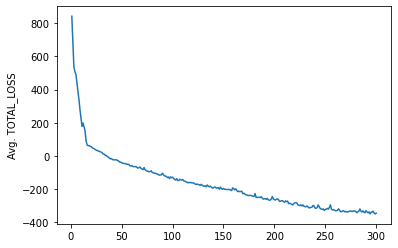

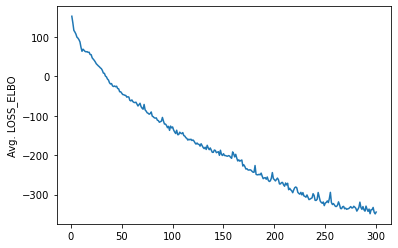

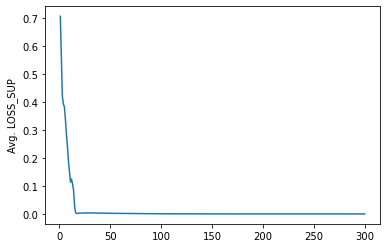

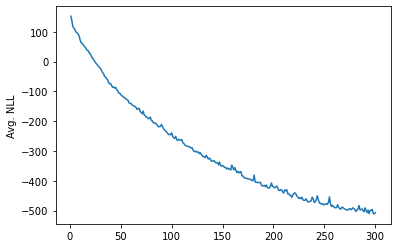

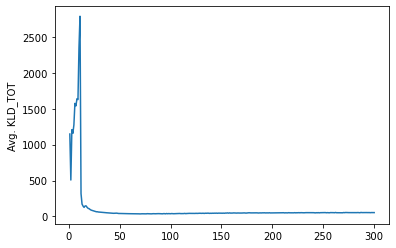

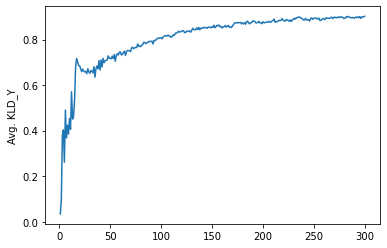

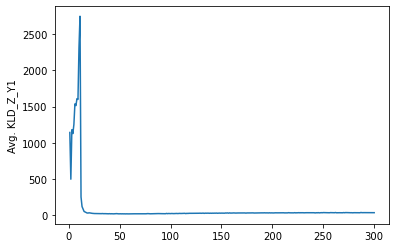

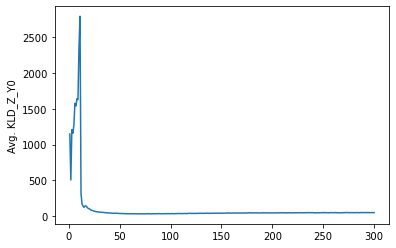

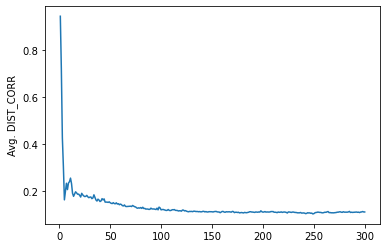

In [28]:
# Plots for losses
for col_name in df_train_metrics.columns:
    if "Avg. " in col_name:
        sns.lineplot(x=epochs_range,y=df_train_metrics[col_name])
        plt.show()

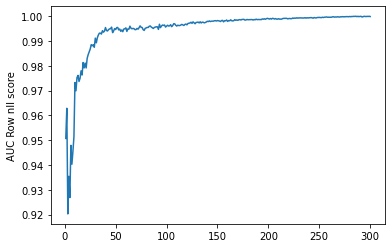

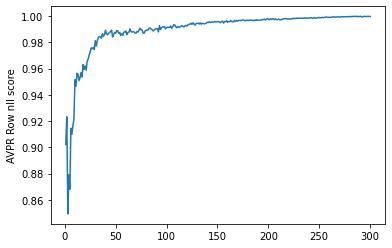

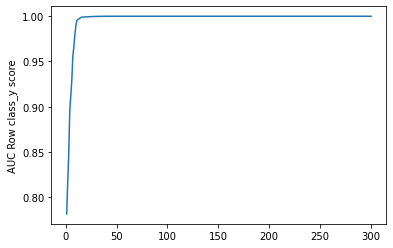

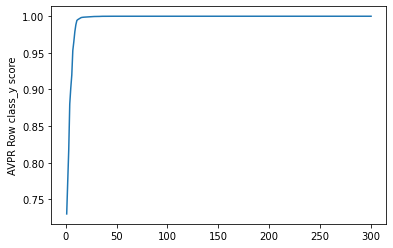

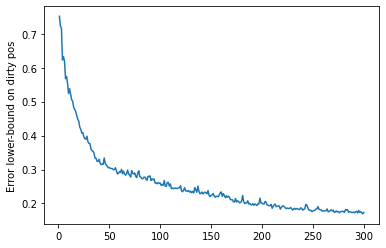

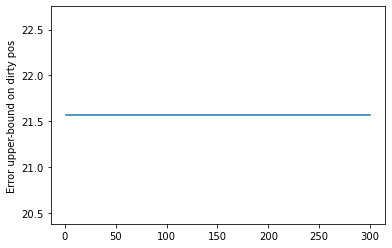

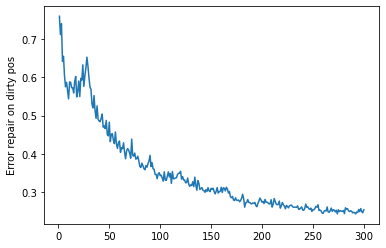

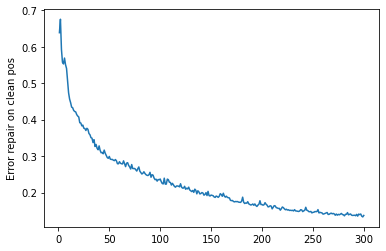

In [29]:
# Plots for classification and repair metrics
list_plot_custom = ["AUC Row nll score", "AVPR Row nll score", 
                    "AUC Row class_y score", "AVPR Row class_y score",
                    "Error lower-bound on dirty pos", "Error upper-bound on dirty pos",
                    "Error repair on dirty pos", "Error repair on clean pos"]

for col_name in list_plot_custom:
    sns.lineplot(x=epochs_range,y=df_train_metrics[col_name])
    plt.show()

## Plots Validation -- Losses

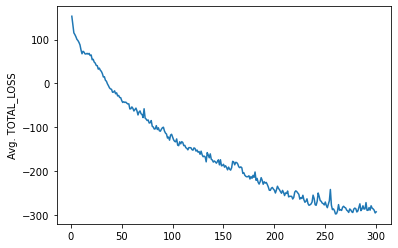

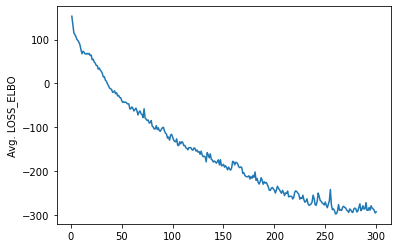

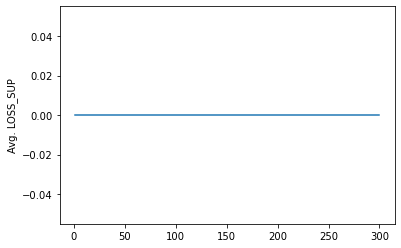

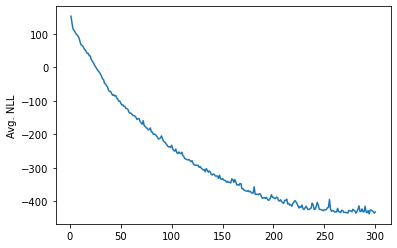

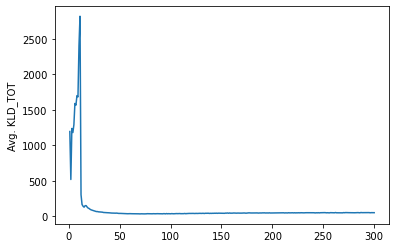

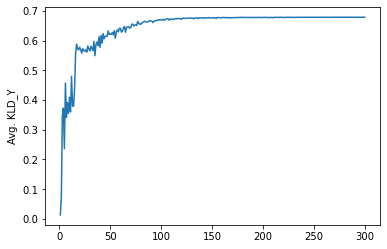

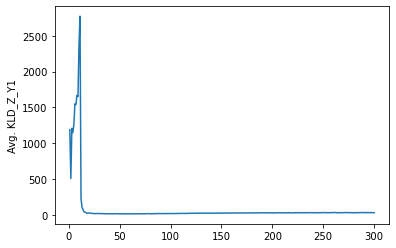

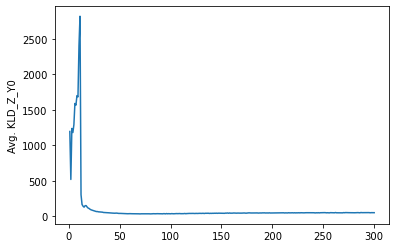

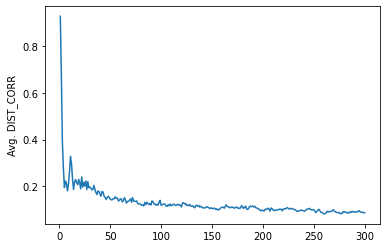

In [30]:
# Plots for losses
for col_name in df_valid_metrics.columns:
    if "Avg. " in col_name:
        sns.lineplot(x=epochs_range,y=df_valid_metrics[col_name])
        plt.show()

### Plot Test -- Losses

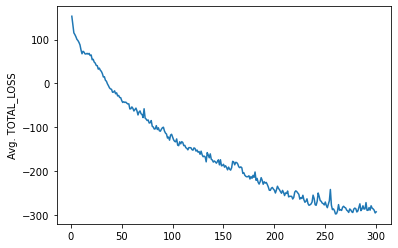

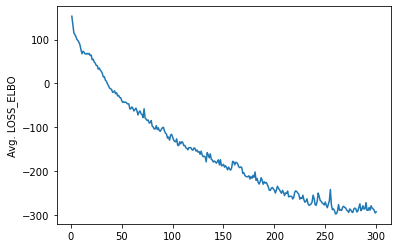

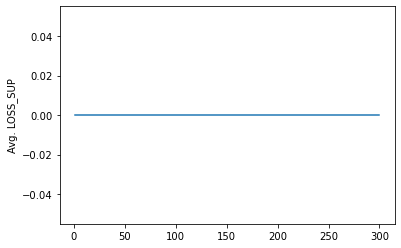

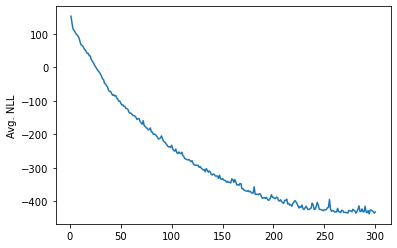

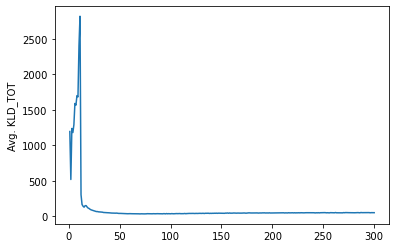

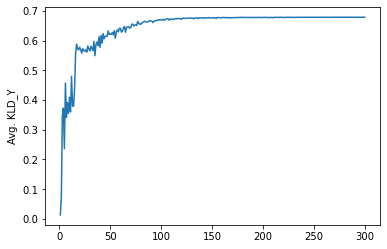

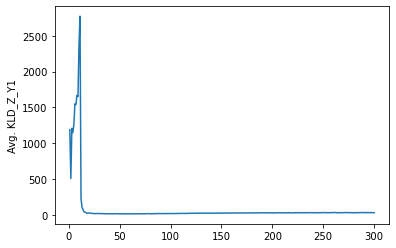

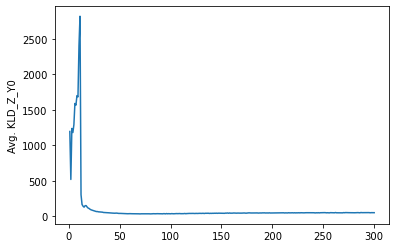

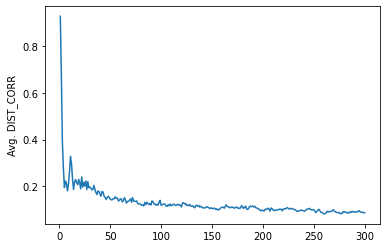

In [31]:
# Plots for losses
for col_name in df_test_metrics.columns:
    if "Avg. " in col_name:
        sns.lineplot(x=epochs_range,y=df_test_metrics[col_name])
        plt.show()

### Get Recons, Latent Space, etc

In [32]:
vae_p_params_xd, vae_q_params, vae_q_samples, _ = vae_mdl(X_train)
recons_train = vae_p_params_xd['recon']['x'].cpu().detach().numpy()
z_train_clean = vae_q_params['z']['mu'].detach().cpu().numpy() # is z_y1 (clean)
z_train_dirty = vae_q_params['z_y0']['mu'].detach().cpu().numpy() # is z_y0 (dirty)


In [33]:
# Show recon logvar
#vae_p_params_xd['recon']['logvar_x'].exp()

In [34]:
# Plot mu's and covariance's

z_train_y1_mu = vae_q_params['z']['mu'].detach().cpu().numpy() # is z_y1 (clean)
z_train_y0_mu = vae_q_params['z_y0']['mu'].detach().cpu().numpy() # is z_y0 (dirty)

z_train_y1_var = np.exp(vae_q_params['z']['logvar'].detach().cpu().numpy()) # is z_y1 (clean)
z_train_y0_var = np.exp(vae_q_params['z_y0']['logvar'].detach().cpu().numpy()) # is z_y0 (dirty)

print("median of variances (per dim), clean: \n {} \n".format(np.median(z_train_y1_var, axis=0)))
print("median of variances (per dim), dirty: \n {} \n".format(np.median(z_train_y0_var, axis=0)))

print("median of means (per dim), clean: \n {} \n".format(np.median(z_train_y1_mu, axis=0)))
print("median of means (per dim), dirty: \n {} \n".format(np.median(z_train_y0_mu, axis=0)))

median of variances (per dim), clean: 
 [2.4513110e-05 2.1421412e-05 8.4737854e-05 2.1273929e-03 4.3438580e-05
 3.1903674e-05 1.0616212e-04 1.8624039e-03 2.0269081e-03 1.6876611e-04
 3.5999998e-01 3.5999998e-01 3.5999998e-01 3.5999998e-01 3.5999998e-01] 

median of variances (per dim), dirty: 
 [2.45131105e-05 2.14214124e-05 8.47378542e-05 2.12739292e-03
 4.34385802e-05 3.19036735e-05 1.06162122e-04 1.86240394e-03
 2.02690810e-03 1.68766113e-04 7.00704604e-02 1.05322674e-01
 5.25950268e-02 9.95566398e-02 7.61560351e-02] 

median of means (per dim), clean: 
 [ 0.03025039  0.00302468  0.01864674 -0.14488508  0.07886455 -0.01541399
 -0.04749794 -0.18634988  0.0810497  -0.03560448  0.          0.
  0.          0.          0.        ] 

median of means (per dim), dirty: 
 [ 3.0250393e-02  3.0246843e-03  1.8646743e-02 -1.4488508e-01
  7.8864552e-02 -1.5413988e-02 -4.7497939e-02 -1.8634988e-01
  8.1049696e-02 -3.5604477e-02  4.0939684e+00 -4.7249622e+00
 -4.8977804e+00  2.1681480e+00  6.31960

In [35]:
recon_imgs_train = recons_train.reshape(-1,28,20)*dataset_obj.cont_stds + dataset_obj.cont_means

### Show Clean Datapoints at Random

y_noise: 0


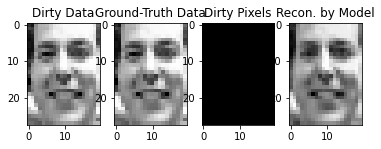

y_noise: 0


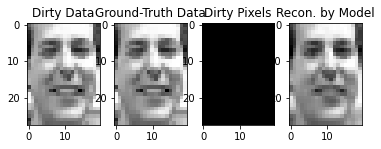

y_noise: 0


y_noise: 0


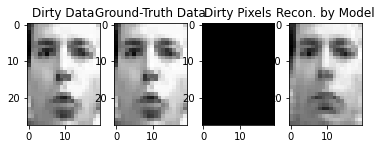

y_noise: 0


y_noise: 0


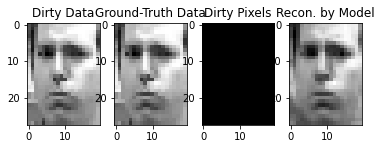

y_noise: 0


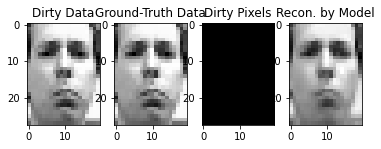

y_noise: 0


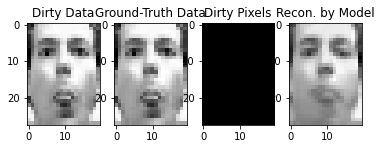

y_noise: 0


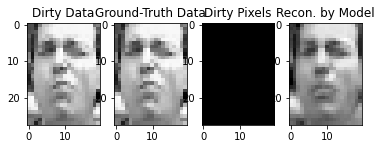

y_noise: 0


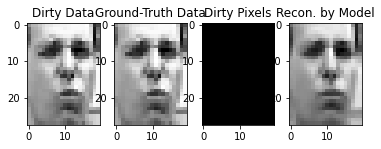

y_noise: 0


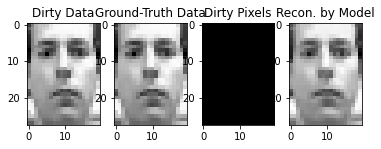

y_noise: 0


y_noise: 0


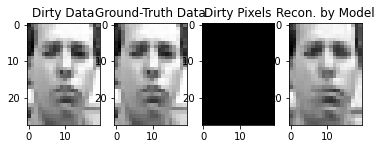

y_noise: 0


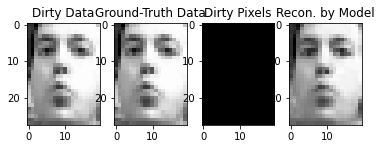

y_noise: 0


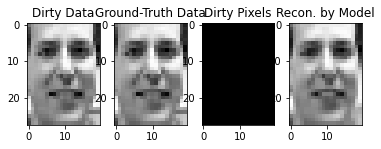

y_noise: 0


y_noise: 0


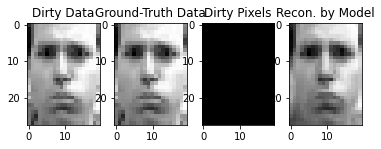

y_noise: 0


y_noise: 0


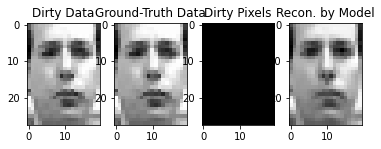

y_noise: 0


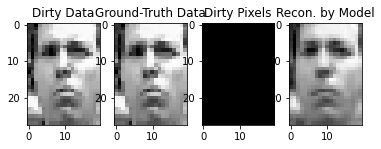

y_noise: 0


y_noise: 0


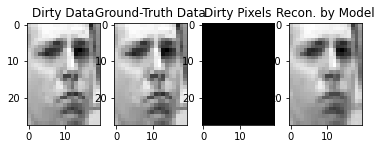

y_noise: 0


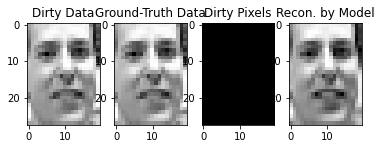

y_noise: 0


y_noise: 0


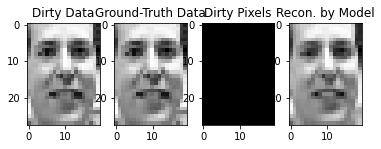

In [36]:
max_imgs_show = 25
y_noise_idxs_train = np.where(~y_noise_instance_train)[0]
some_idxs = np.random.permutation(y_noise_idxs_train)[:max_imgs_show]
# y_noise -- 1 if instance dirty; 0 if instance clean. (NOTE: inverted meaning in generative model)
    
for idx in some_idxs:
    print("y_noise: {}".format(int(y_noise_instance_train[idx])))
    fig, ax = plt.subplots(1,4)
    ax[0].imshow(x_train_orig[idx,...], cmap="gray", ) # vmin=0.0, vmax=1.0
    ax[0].set_title("Dirty Data")
    ax[1].imshow(x_train_clean_orig[idx,...], cmap="gray", ) # vmin=0.0, vmax=1.0
    ax[1].set_title("Ground-Truth Data")
    ax[2].imshow(y_noise_pixels_train[idx,...], cmap="gray", ) # vmin=0.0, vmax=1.0
    ax[2].set_title("Dirty Pixels")
    #ax[3].imshow(recon_imgs_train[idx,...], cmap="gray",) #  vmin=0.0, vmax=1.0
    ax[3].imshow(recon_imgs_train[idx,...], cmap="gray",) #  vmin=0.0, vmax=1.0
    ax[3].set_title("Recon. by Model")
    plt.show()



### Show Dirty Datapoints at Random

y_noise: 1


y_noise: 1


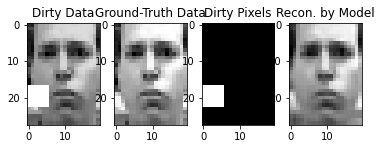

y_noise: 1


y_noise: 1


y_noise: 1


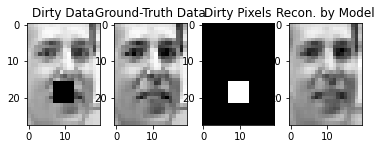

y_noise: 1


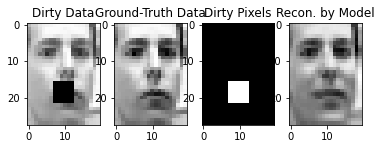

y_noise: 1


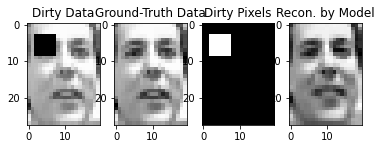

y_noise: 1


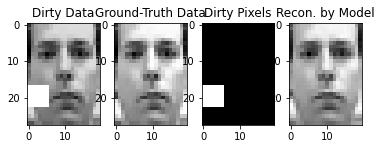

y_noise: 1


y_noise: 1


y_noise: 1


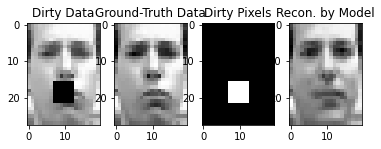

y_noise: 1


y_noise: 1


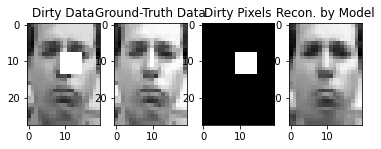

y_noise: 1


y_noise: 1


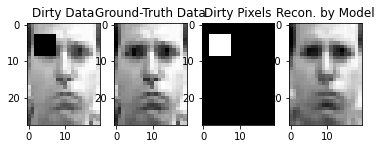

y_noise: 1


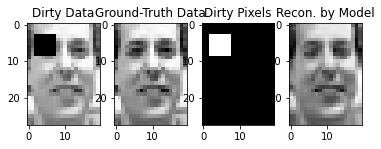

y_noise: 1


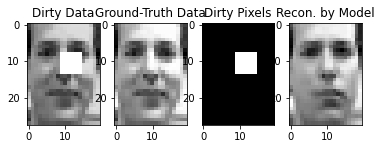

y_noise: 1


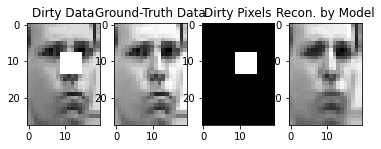

y_noise: 1


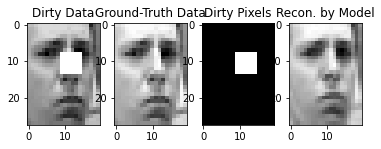

y_noise: 1


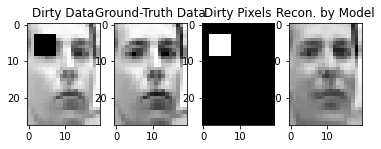

y_noise: 1


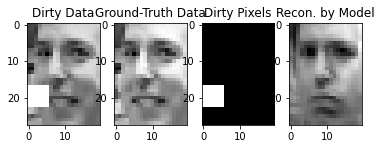

y_noise: 1


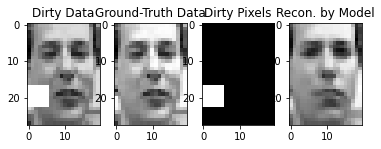

y_noise: 1


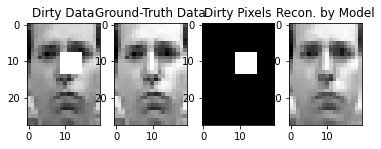

y_noise: 1


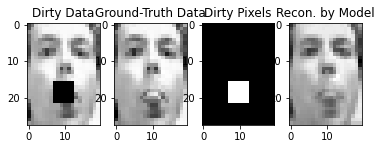

y_noise: 1


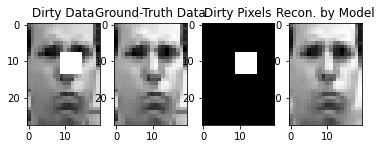

In [37]:
max_imgs_show = 25
y_noise_idxs_train = np.where(y_noise_instance_train)[0]
some_idxs = np.random.permutation(y_noise_idxs_train)[:max_imgs_show]
# y_noise -- 1 if instance dirty; 0 if instance clean. (NOTE: inverted meaning in generative model)
    
for idx in some_idxs:
    print("y_noise: {}".format(int(y_noise_instance_train[idx])))
    fig, ax = plt.subplots(1,4)
    ax[0].imshow(x_train_orig[idx,...], cmap="gray", ) # vmin=0.0, vmax=1.0
    ax[0].set_title("Dirty Data")
    ax[1].imshow(x_train_clean_orig[idx,...], cmap="gray") # , vmin=0.0, vmax=1.0
    ax[1].set_title("Ground-Truth Data")
    ax[2].imshow(y_noise_pixels_train[idx,...], cmap="gray") # , vmin=0.0, vmax=1.0
    ax[2].set_title("Dirty Pixels")
    ax[3].imshow(recon_imgs_train[idx,...], cmap="gray",) #  vmin=0.0, vmax=1.0
    #ax[3].imshow(recon_imgs_train[idx,...], cmap="gray") # , vmin=0.0, vmax=1.0
    ax[3].set_title("Recon. by Model")
    plt.show()



### Show per noise type images: y_noise_lists or y_noise_dict

Noise Tag: 0
Noise Indices: 
[932, 474, 203, 1513, 1003, 1530, 303, 546, 1071, 760, 429, 1418, 1083, 287, 1348, 1140, 330, 1386, 885, 331, 895, 33, 705, 698, 558, 1427, 843, 1193, 746, 867, 1500, 671, 1415, 1130, 1304, 129, 937, 1118, 1372, 422, 523, 261, 1397, 1152, 953, 1349, 271, 872, 928, 779, 173, 1166, 21, 454, 399, 1391, 894, 797, 561, 1145, 1081, 1195, 554, 1554, 1208, 1317, 253, 6, 670, 1390, 456, 1550, 1061, 1436, 1199, 1232, 1562, 1339, 1393, 681, 1213, 248, 1244, 424, 92, 350, 1485, 919, 1279, 225, 644, 552, 179, 1464, 355, 403, 25, 88, 1478, 852, 854, 1139, 909, 1503, 148, 348, 1157, 300, 1340, 688, 916, 436, 1337, 112, 956, 347, 724, 265, 356, 1137, 817, 619, 929, 962, 368, 335, 1205, 259, 1553, 689]
y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 0


y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 0


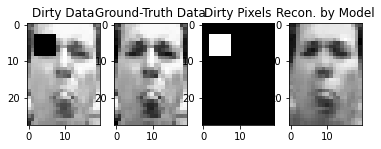

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 0


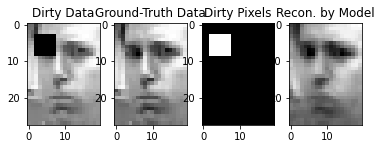

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 0


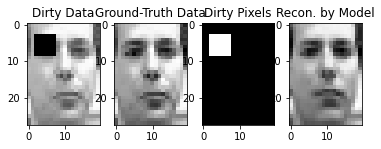

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 0


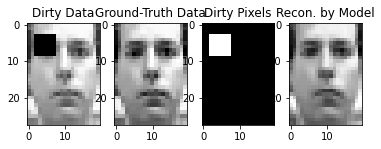

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 0


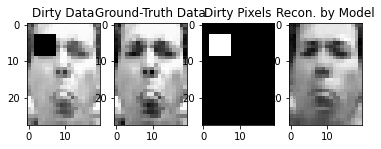

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 0


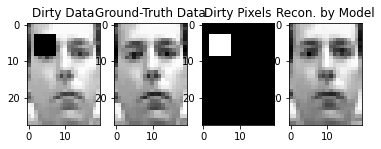

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 0


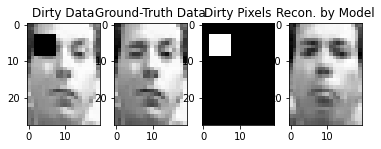

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 0


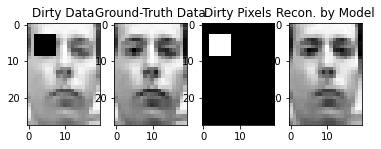

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 0


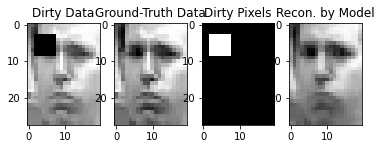







Noise Tag: 1
Noise Indices: 
[930, 1476, 650, 161, 45, 2, 1198, 1434, 616, 614, 150, 651, 162, 661, 1063, 100, 631, 1050, 328, 1128, 798, 1057, 1033, 1255, 384, 604, 756, 487, 816, 612, 1188, 493, 1214, 1223, 44, 1456, 636, 205, 164, 998, 1510, 295, 157, 773, 765, 1571, 8, 1266, 1173, 1442, 755, 1009, 1315, 1481, 396, 1286, 726, 1067, 1225, 250, 1566, 362, 800, 559, 1408, 483, 435, 841, 431, 70, 82, 514, 444, 34, 738, 234, 1169, 1074, 332, 570, 1020, 1264, 1399, 673, 1471, 1480, 397, 1298, 1398, 393, 1068, 499, 383, 116, 195, 196, 562, 281, 90, 1141, 1345, 285, 1184, 1191, 1330, 511, 305, 55, 1370, 473, 1552, 238, 278, 969, 1238, 1175, 732, 439, 402, 1319, 1308, 740, 188, 898, 596, 1116, 1343, 741, 1289, 211, 1196, 140, 1551, 1302, 1248, 1375, 730, 1052, 1377, 923, 1565, 1189, 1010, 450]
y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 1


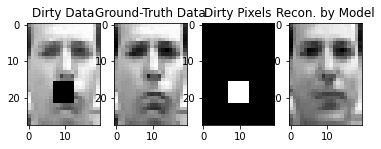

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 1


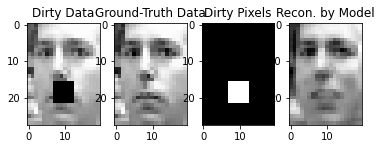

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 1


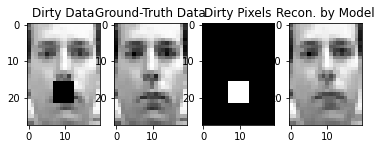

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 1


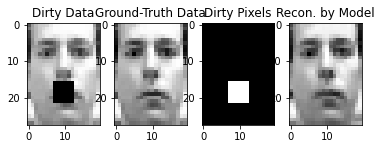

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 1


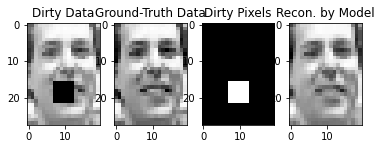

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 1


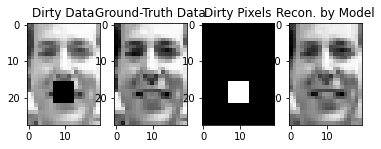

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 1


y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 1


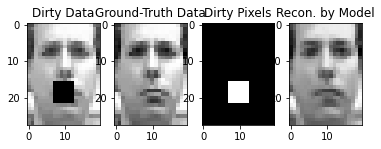

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 1


y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 1








Noise Tag: 2
Noise Indices: 
[1004, 1093, 491, 252, 711, 1075, 1463, 68, 1369, 433, 158, 997, 375, 412, 1455, 1428, 597, 340, 7, 336, 538, 543, 390, 657, 500, 1371, 1096, 322, 957, 154, 10, 993, 13, 128, 497, 1546, 1406, 821, 121, 1262, 130, 1056, 676, 757, 634, 1328, 678, 1097, 1534, 708, 955, 795, 679, 943, 310, 587, 1525, 381, 859, 1219, 653, 857, 220, 57, 981, 451, 982, 845, 254, 411, 806, 582, 1030, 477, 1127, 298, 169, 42, 1462, 563, 1441, 547, 1103, 588, 663, 1294, 739, 759, 1338, 864, 703, 1438, 1320, 959, 617, 366, 938, 279, 1265, 1517, 319, 526, 1099, 96, 1007, 702, 472, 530, 1186, 230, 1104, 989, 822, 1569, 949, 1240, 1332, 975, 579, 1107, 1488, 1060, 1037, 625, 1494, 327, 1153, 379, 1300, 788, 176, 1344, 1496, 1042, 1439]
y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 2


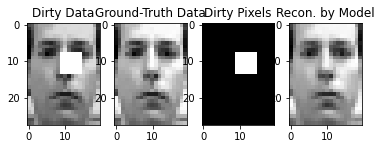

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 2


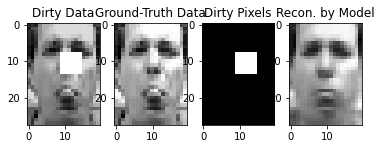

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 2


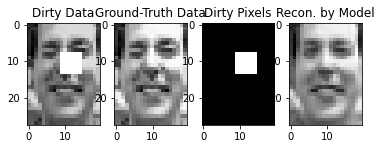

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 2


y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 2


y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 2


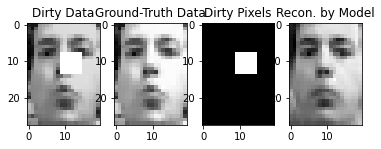

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 2


y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 2


y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 2


y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 2


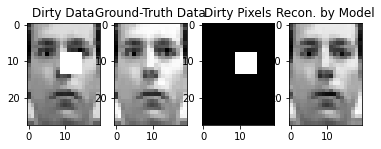







Noise Tag: 3
Noise Indices: 
[1079, 577, 476, 359, 312, 155, 1234, 388, 805, 231, 1498, 723, 1110, 1489, 633, 457, 308, 507, 1411, 697, 1365, 496, 1564, 1258, 525, 1101, 1172, 920, 181, 510, 1149, 1284, 27, 1417, 555, 1158, 413, 1201, 486, 802, 1549, 1402, 731, 1283, 437, 52, 245, 1251, 1453, 1531, 1380, 72, 753, 1495, 865, 288, 1492, 823, 660, 694, 1334, 1105, 1041, 210, 223, 520, 882, 110, 200, 1394, 1029, 835, 339, 301, 373, 296, 466, 1220, 1429, 1049, 1027, 1069, 1087, 896, 349, 1292, 907, 395, 1025, 1364, 1314, 830, 1414, 275, 601, 542, 191, 11, 1506, 446, 967, 360, 1072, 3, 40, 785, 808, 1450, 1121, 1293, 463, 610, 434, 803, 539, 479, 316, 1170, 1167, 1341, 700, 970, 1085, 971, 573]
y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 3


y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 3


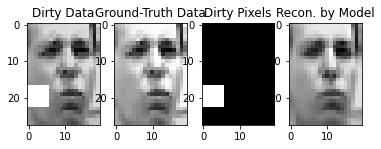

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 3


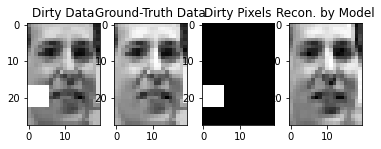

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 3


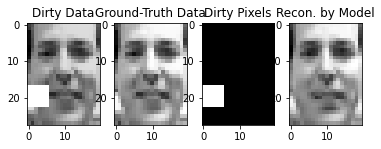

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 3


y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 3


y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 3


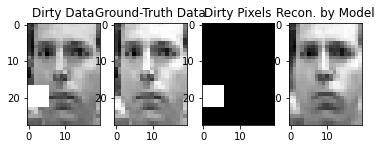

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 3


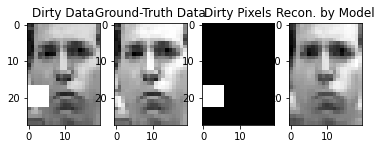

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 3


y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 3


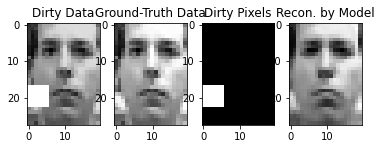

In [38]:
## show per noise type images: y_noise_lists or y_noise_dict

max_show_n = 10

for noise_key, noise_idxs in y_noise_dict_train.items():
    
    print("Noise Tag: {}".format(noise_key))
    print("Noise Indices: \n{}".format(noise_idxs))
    
    _selected_idxs = np.random.permutation(noise_idxs)[:max_show_n]
    
    for idx in _selected_idxs:
    
        print("y_class (clean): {} | y_noise: {} | y_noise_tag (noise type): {}".format(
            0, y_noise_instance_train[idx], noise_key)) # y_class_train[idx]
        fig, ax = plt.subplots(1,4)
        ax[0].imshow(x_train_orig[idx,...],cmap="gray")
        ax[0].set_title("Dirty Data")
        ax[1].imshow(x_train_clean_orig[idx,...],cmap="gray")
        ax[1].set_title("Ground-Truth Data")
        ax[2].imshow(y_noise_pixels_train[idx,...],cmap="gray")
        ax[2].set_title("Dirty Pixels")
        #ax[3].imshow(recon_imgs_train[idx,...], cmap="gray") # , vmin=0.0, vmax=1.0
        ax[3].imshow(recon_imgs_train[idx,...], cmap="gray") # , vmin=0.0, vmax=1.0
        ax[3].set_title("Recon. by Model")
        plt.show()
        
    print("\n\n\n\n\n")


### Show Trusted Set (Clean Ground-Truth, Train Data, Recon)

In [39]:
len(trusted_idxs_train)

50

y_noise: 0


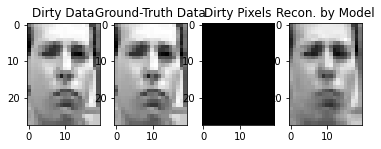

y_noise: 0


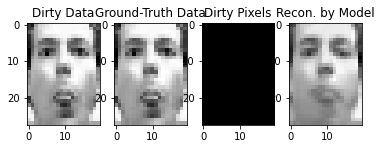

y_noise: 0


y_noise: 0


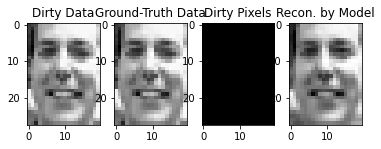

y_noise: 0


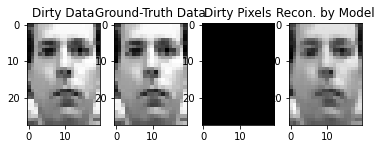

y_noise: 0


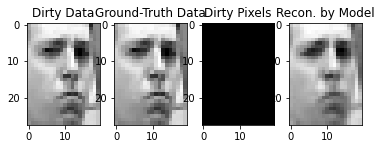

y_noise: 0


y_noise: 0


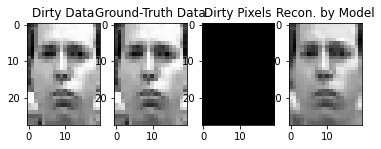

y_noise: 0


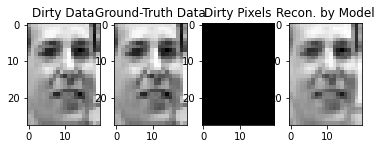

y_noise: 0


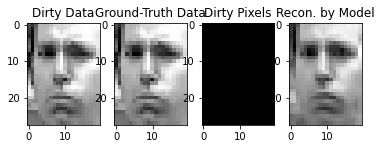

y_noise: 1


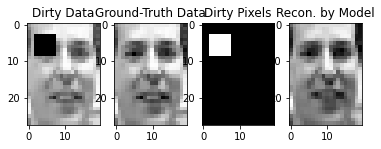

y_noise: 1


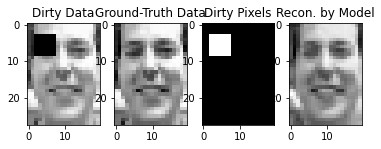

y_noise: 1


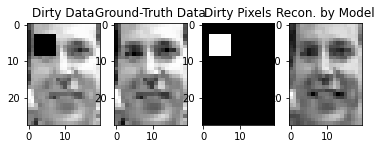

y_noise: 1


y_noise: 1


y_noise: 1


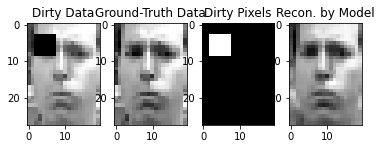

y_noise: 1


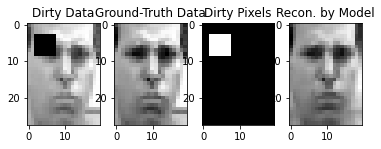

y_noise: 1


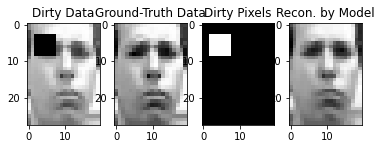

y_noise: 1


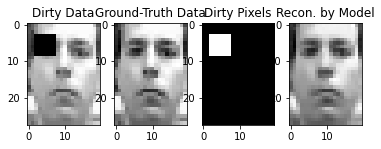

y_noise: 1


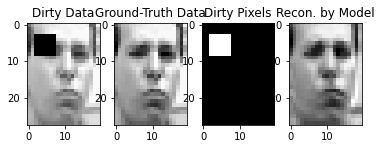

y_noise: 1


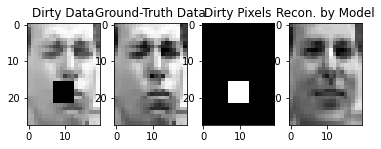

y_noise: 1


y_noise: 1


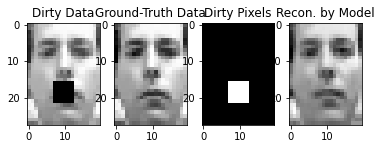

y_noise: 1


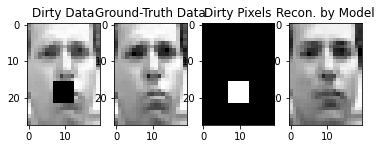

y_noise: 1


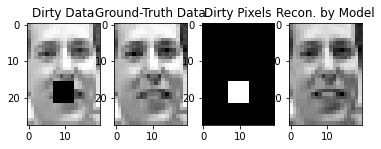

y_noise: 1


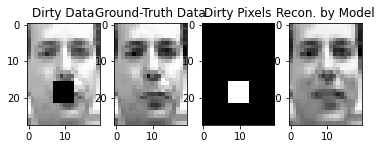

y_noise: 1


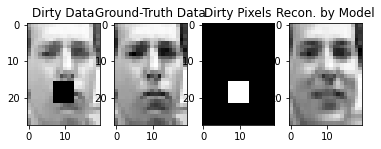

y_noise: 1


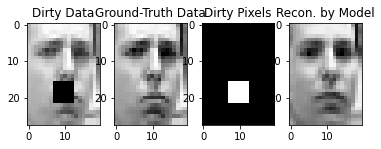

y_noise: 1


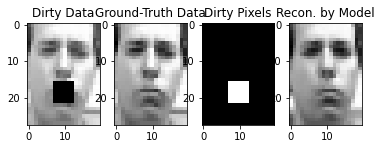

y_noise: 1


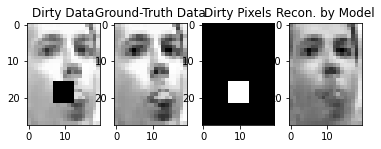

y_noise: 1


y_noise: 1


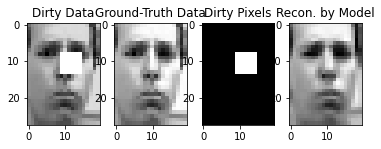

y_noise: 1


y_noise: 1


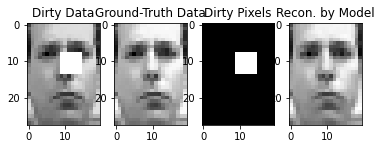

y_noise: 1


y_noise: 1


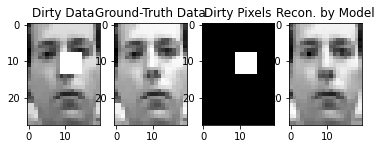

y_noise: 1


y_noise: 1


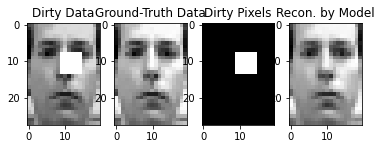

y_noise: 1


y_noise: 1


y_noise: 1


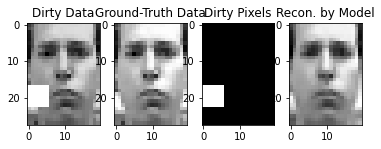

y_noise: 1


y_noise: 1


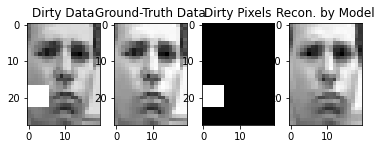

y_noise: 1


y_noise: 1


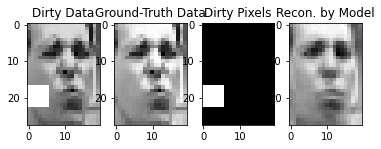

y_noise: 1


y_noise: 1


y_noise: 1


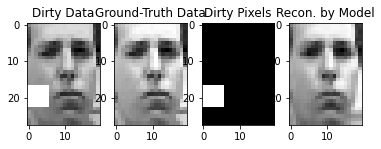

y_noise: 1


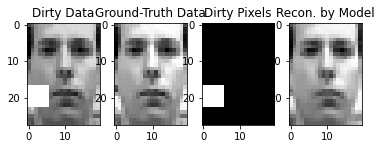

y_noise: 1


In [40]:
    
for idx in trusted_idxs_train:
    print("y_noise: {}".format(int(y_noise_instance_train[idx])))
    fig, ax = plt.subplots(1,4)
    ax[0].imshow(x_train_orig[idx,...], cmap="gray") # , vmin=0.0, vmax=1.0
    ax[0].set_title("Dirty Data")
    ax[1].imshow(x_train_clean_orig[idx,...], cmap="gray") # , vmin=0.0, vmax=1.0
    ax[1].set_title("Ground-Truth Data")
    ax[2].imshow(y_noise_pixels_train[idx,...], cmap="gray") # , vmin=0.0, vmax=1.0
    ax[2].set_title("Dirty Pixels")
    ax[3].imshow(recon_imgs_train[idx,...], cmap="gray") # , vmin=0.0, vmax=1.0
    ax[3].imshow(recon_imgs_train[idx,...], cmap="gray")
    ax[3].set_title("Recon. by Model")
    plt.show()


### Show Latent Space

In [41]:
noised_rows = y_noise_instance_train
noised_rows_str = ["Inlier" if not row_val else "Outlier" for row_val in noised_rows]

#### PCA

In [42]:
from sklearn.decomposition import PCA

all_z_train = np.concatenate([z_train_clean,z_train_dirty], axis=0)
pca_2d_z = PCA(n_components=2) # PCA
pca_2d_z.fit(all_z_train)

PCA(n_components=2)

In [43]:
pca_2d_z.explained_variance_

array([89.59581  ,  0.8885104], dtype=float32)

In [44]:
z_train_pca2d_clean = pca_2d_z.transform(z_train_clean)
z_train_pca2d_dirty = pca_2d_z.transform(z_train_dirty)

Text(0.5, 1.0, 'Latent Space Z (Projection to 2D): for q(z|x,y=1)')

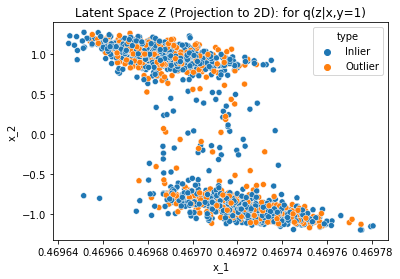

In [45]:
df_plot_z_pca2d_y1 = pd.DataFrame({"x_1": z_train_pca2d_clean[:,0], 
                                   "x_2": z_train_pca2d_clean[:,1], 
                                   "type": noised_rows_str})
sns.scatterplot(x="x_1",y="x_2",hue="type",data=df_plot_z_pca2d_y1)
plt.title("Latent Space Z (Projection to 2D): for q(z|x,y=1)")

In [46]:
df_plot_z_pca2d_y0 = pd.DataFrame({"x_1": z_train_pca2d_dirty[:,0], 
                                   "x_2": z_train_pca2d_dirty[:,1], 
                                   "type": noised_rows_str})
sns.scatterplot(x="x_1",y="x_2",hue="type",data=df_plot_z_pca2d_y0)
plt.title("Latent Space Z (Projection to 2D): for q(z|x,y=0)")

Text(0.5, 1.0, 'Latent Space Z (Projection to 2D): for q(z|x,y=0)')

### Kernel PCA

In [47]:
from sklearn.decomposition import KernelPCA

kpca_2d_z = KernelPCA(n_components=2, kernel='rbf', degree=5)
kpca_2d_z.fit(all_z_train)

KernelPCA(degree=5, kernel='rbf', n_components=2)

In [48]:
z_train_kpca2d_clean = kpca_2d_z.transform(z_train_clean)
z_train_kpca2d_dirty = kpca_2d_z.transform(z_train_dirty)

In [49]:
df_plot_z_kpca2d_y1 = pd.DataFrame({"x_1": z_train_kpca2d_clean[:,0], 
                                    "x_2": z_train_kpca2d_clean[:,1], 
                                    "type": noised_rows_str})
sns.scatterplot(x="x_1",y="x_2",hue="type",data=df_plot_z_kpca2d_y1)
plt.title("Latent Space Z (Projection to 2D): for q(z|x,y=1)")

Text(0.5, 1.0, 'Latent Space Z (Projection to 2D): for q(z|x,y=1)')

Text(0.5, 1.0, 'Latent Space Z (Projection to 2D): for q(z|x,y=0)')

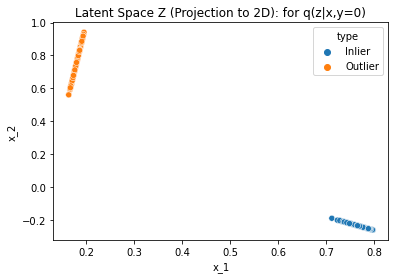

In [50]:
df_plot_z_kpca2d_y0 = pd.DataFrame({"x_1": z_train_kpca2d_dirty[:,0], 
                                    "x_2": z_train_kpca2d_dirty[:,1], 
                                    "type": noised_rows_str})
sns.scatterplot(x="x_1",y="x_2",hue="type",data=df_plot_z_kpca2d_y0)
plt.title("Latent Space Z (Projection to 2D): for q(z|x,y=0)")

#### T-SNE

In [51]:
from sklearn.manifold import TSNE

In [52]:
tsne_2d_z = TSNE(n_components=2, perplexity=180.0, n_iter=5000)
_z_all_2d = tsne_2d_z.fit_transform(all_z_train)

In [53]:
_len_dataset = z_train_pca2d_clean.shape[0]

z_train_tsne2d_clean = _z_all_2d[:_len_dataset]
z_train_tsne2d_dirty = _z_all_2d[_len_dataset:]

In [54]:
df_plot_z_tsne2d_y1 = pd.DataFrame({"x_1": z_train_tsne2d_clean[:,0], 
                                   "x_2": z_train_tsne2d_clean[:,1], 
                                   "type": noised_rows_str})
sns.scatterplot(x="x_1",y="x_2",hue="type",data=df_plot_z_tsne2d_y1)
plt.title("Latent Space Z (Projection to 2D): for q(z|x,y=1)")

Text(0.5, 1.0, 'Latent Space Z (Projection to 2D): for q(z|x,y=1)')

In [55]:
df_plot_z_tsne2d_y0 = pd.DataFrame({"x_1": z_train_tsne2d_dirty[:,0], 
                                   "x_2": z_train_tsne2d_dirty[:,1], 
                                   "type": noised_rows_str})
sns.scatterplot(x="x_1",y="x_2",hue="type",data=df_plot_z_tsne2d_y0)
plt.title("Latent Space Z (Projection to 2D): for q(z|x,y=0)")

Text(0.5, 1.0, 'Latent Space Z (Projection to 2D): for q(z|x,y=0)')

### Approx. Log-Likelihood

In [56]:
from repair_syserr_models.loss_utils import log_px_approx_eval

In [57]:
# TODO: insert option for cuda vs. cpu !!
x_inputs = X_train.cuda()
vae_mdl.cuda();


In [58]:
with torch.autograd.profiler.profile(use_cuda=True, profile_memory=True) as prof:

    # log p(x|y) evaluation, for both y=1 and y=0
    elbo_iwae_map = log_px_approx_eval(vae_mdl,
                                       dataset_obj,
                                       x_inputs,
                                       k_samples=250,
                                       y_comps=True,
                                       batch_size=128)

    # to clear GPU Mem -- if used.
    log_px_est_y1 = elbo_iwae_map["y1"].clone().cpu()
    log_px_est_y0 = elbo_iwae_map["y0"].clone().cpu()
    
    del elbo_iwae_map["y1"]
    del elbo_iwae_map["y0"]
    del elbo_iwae_map
    torch.cuda.empty_cache()


Compute Progress: 100%|█████████████████████████████████████████████| 13/13 [00:00<00:00, 37.41it/s]


In [59]:
# print(prof)

In [60]:
arrs_elbo_iwae = np.concatenate([log_px_est_y1,log_px_est_y0,y_noise_instance_train.reshape(-1,1)], axis=1)

df_elbo_iwae = pd.DataFrame(arrs_elbo_iwae, columns=["log_px_y1", "log_px_y0", "noise_label"])
df_elbo_iwae["noise_label"] = df_elbo_iwae["noise_label"].apply(lambda x: "dirty" if x==1 else "clean")

In [61]:
df_elbo_iwae

log_px_y1   log_px_y0 noise_label
0      399.581665  166.847748       clean
1      458.324615  224.880630       clean
2    -1341.550415  646.776062       dirty
3     -707.858582  626.684570       dirty
4      369.077057  193.935425       clean
...           ...         ...         ...
1567   666.230713  589.028442       clean
1568   484.050812  213.858627       clean
1569  -784.676392  359.303833       dirty
1570   504.133148  360.635956       clean
1571 -2201.752441  437.899506       dirty

[1572 rows x 3 columns]

In [62]:
def move_legend(ax, new_loc, **kws):
    old_legend = ax.legend_
    handles = old_legend.legendHandles
    labels = [t.get_text() for t in old_legend.get_texts()]
    title = old_legend.get_title().get_text()
    ax.legend(handles, labels, loc=new_loc, title=title, **kws)
    

In [63]:
fig, axes = plt.subplots(1,2, figsize=(18,8))

sns.kdeplot(ax=axes[0], data=df_elbo_iwae, x="log_px_y1", hue="noise_label", fill=True, legend=True)

axes[0].set_title("log-likelihood of $p_{\\theta}(\mathbf{x}|y=1)$")
move_legend(axes[0], "upper left")


sns.kdeplot(ax=axes[1], data=df_elbo_iwae, x="log_px_y0", hue="noise_label", fill=True, legend=True)

axes[1].set_title("log-likelihood of $p_{\\theta}(\mathbf{x}|y=0)$")
move_legend(axes[1], "upper left")


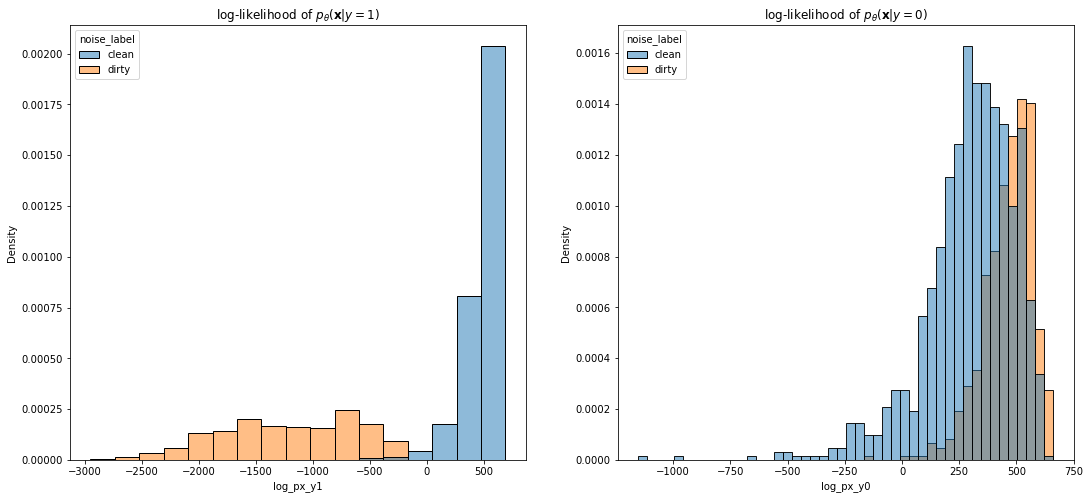

In [64]:
fig, axes = plt.subplots(1,2, figsize=(18,8))

sns.histplot(ax=axes[0], data=df_elbo_iwae, x="log_px_y1", hue="noise_label", legend=True, stat="density")
axes[0].set_title("log-likelihood of $p_{\\theta}(\mathbf{x}|y=1)$")
move_legend(axes[0], "upper left")

sns.histplot(ax=axes[1], data=df_elbo_iwae, x="log_px_y0", hue="noise_label", legend=True, stat="density")
axes[1].set_title("log-likelihood of $p_{\\theta}(\mathbf{x}|y=0)$")
move_legend(axes[1], "upper left")


In [65]:
def epdf(xs, bins):
    xmin, xmax = np.inf, -np.inf
    for xi in xs:
        xmin = min(xmin, np.nanmin(xi))
        xmax = max(xmax, np.nanmax(xi))
    bin_range = (xmin, xmax)
    bins = np.lib.histograms.histogram_bin_edges(np.concatenate(xs), bins, bin_range)
    tops = []
    for xi in xs:
        m, _ = np.histogram(xi, bins, density=True)
        tops.append(m.astype(float))
    return tops, bins


In [66]:
tops, bin_edges = epdf([log_px_est_y1.numpy().flatten()[~y_noise_instance_train], log_px_est_y1.numpy().flatten()[y_noise_instance_train]], 25)
top_model, top_data = tops[0], tops[1]

In [67]:
np.sum(np.abs(top_model - top_data))

0.013638103831761094

In [68]:
def histogram_intersection(h1, h2, bins):
    bins = np.diff(bins)
    sm = 0
    for i in range(len(bins)):
        sm += min(bins[i]*h1[i], bins[i]*h2[i])
    return sm

In [69]:
histogram_intersection(tops[0], tops[1], bin_edges)

0.007653005996839211